1.4 Geetting data
=============================
This notebook will introduce the techniques to access data in the web using services request.<br>
Accessing data via services request is the easiest way. The data is requested using an API available at the server.<br>
Before getting access to it, the user must get an **api_key** to authenticate the call.<br>
The Python's module dealing with the API mode is **requests**

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

We need the URL where data are located.<br>
URL's tend to have information related to the data we are after.

In [9]:
url = 'https://www.quandl.com/api/v3/datasets/CHRIS/MGEX_IH1.json?api_key=DotPcR2Bpi7uezRsnS-S'

Here, **CHRIS** is the dataset, **MGEX_IH1** is the data code and **DotPcR2Bpi7uezRsnS-S** is the api_key.<br>
We can use a clever way to create the URL.

In [2]:
dataset = 'EURONEXT'
code = 'TFA'
apikey = 'DotPcR2Bpi7uezRsnS-S'

In [3]:
url = 'https://www.quandl.com/api/v3/datasets/%s/%s.json?api_key=%s' % (dataset,code,apikey)
print(url)

https://www.quandl.com/api/v3/datasets/EURONEXT/TFA.json?api_key=DotPcR2Bpi7uezRsnS-S


To get the data, we simply need to call the **get** method from **requests**

In [4]:
response = requests.get(url)

The return is a JSON file (look at the URL...).<br>
JSON files are the most frequent file format when accesing data through APIs.<br>
We just need to _activate_ the response with the **.json** method

In [9]:
RESPONSE = response.json()

Now we are able to print the RESPONSE.<br>
AS you can see the JSON format looks very similar to a dictionnary...

In [10]:
RESPONSE

{'dataset': {'id': 9820710,
  'dataset_code': 'TFA',
  'database_code': 'EURONEXT',
  'name': 'Telefonica (TFA)',
  'description': 'Stock Prices for Telefonica from the Euronext Stock Exchange. Currency: EUR. Market: Traded not listed Brussels',
  'refreshed_at': '2019-01-25T17:15:37.636Z',
  'newest_available_date': '2019-01-25',
  'oldest_available_date': '2014-02-14',
  'column_names': ['Date',
   'Open',
   'High',
   'Low',
   'Last',
   'Volume',
   'Turnover'],
  'frequency': 'daily',
  'type': 'Time Series',
  'premium': False,
  'limit': None,
  'transform': None,
  'column_index': None,
  'start_date': '2014-02-14',
  'end_date': '2019-01-25',
  'data': [['2019-01-25', 7.654, 7.654, 7.654, 7.654, 530.0, 4056.62],
   ['2019-01-23', 7.66, 7.704, 7.66, 7.704, 600.0, 4609.2],
   ['2019-01-16', 7.544, 7.544, 7.532, 7.532, 1562.0, 11770.98],
   ['2019-01-15', 7.545, 7.545, 7.545, 7.545, 106.0, 799.77],
   ['2019-01-14', 7.317, 7.317, 7.317, 7.317, 380.0, 2780.46],
   ['2019-01-11',

Likewise dictionaries, information is accesible through _keys_

In [11]:
RESPONSE['dataset']['column_names']

['Date', 'Open', 'High', 'Low', 'Last', 'Volume', 'Turnover']

And we can convert the data into a Pandas DataFrame.

In [12]:
DATA = pd.DataFrame.from_dict(RESPONSE['dataset']['data'])

In [13]:
# Let's rename the columns
DATA.columns = RESPONSE['dataset']['column_names']

In [16]:
DATA.tail()

,Date,Open,High,Low,Last,Volume,Turnover
1141,2014-02-20,11.25,11.27,11.25,11.27,1009.0,11355.35
1142,2014-02-19,11.25,11.25,11.25,11.25,102.0,1147.50
1143,2014-02-18,11.15,11.31,11.15,11.25,5950.0,66894.75
1144,2014-02-17,11.68,11.68,11.30,11.30,2530.0,28659.20
1145,2014-02-14,11.22,11.42,11.22,11.33,11922.0,135917.01


Done! Now we can play around with the data.

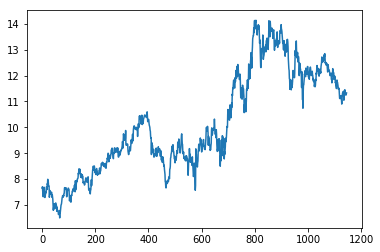

In [15]:
plt.plot(DATA['Last'])

<br>

If the information is not available through an API, we do what is called '_web scraping_'.<br>

First we need to download the HTML page.<br>

In [46]:
url = 'https://markets.ft.com/data/funds/tearsheet/historical?s=LU0207025593:EUR'

In [47]:
page = requests.get(url)

In Python, the module dealing with HTML contents is called **BeautifulSoup**

In [27]:
from bs4 import BeautifulSoup

We apply the html parser to the requests return

In [48]:
soup = BeautifulSoup(page.text, 'html.parser')

soup looks like a typical web page now

In [49]:
soup


<!DOCTYPE html>

<html class="no-js core o-hoverable-on" lang="en-us">
<head>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="Latest Ulysses - L.T. Funds European General A EUR (LU0207025593:EUR) share price with interactive charts, historical prices, comparative analysis, forecasts, business profile and more." name="description"/>
<meta content="Ulysses - L.T. Funds European General A EUR price, Ulysses - L.T. Funds European General A EUR quote" name="keywords"/>
<link href="//im.ft-static.com/m/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<title>Ulysses - L.T. Funds European General A EUR, LU0207025593:EUR historical prices - FT.com</title>
<!--[if lt IE 9]>
			<script src="/data/content/scripts/vendor/html5shiv.js"></script>
		<![endif]-->
<link href="/data/content/styles/origami/origami.css?v=2" rel="stylesheet"/>
<link href="/data/bundles/styles/co

Now the hard bit... We need to insvestigate where is the information we are after.<br>

In [64]:
spansymb = soup.find_all('div',class_ = 'mod-tearsheet-overview__header__symbol')
spansymb[0].span.text

'LU0207025593:EUR'

In [66]:
tdpri = soup.find_all('table', class_ ="mod-ui-table mod-tearsheet-historical-prices__results mod-ui-table--freeze-pane")

In [67]:
for row in tdpri:
    for tds in row.find_all('td'):
        
        try:
            print(tds.span.text)
        except:
            print(tds.text)

Friday, January 25, 2019
274.80
274.80
274.80
274.80
--
Thursday, January 24, 2019
271.93
271.93
271.93
271.93
--
Wednesday, January 23, 2019
270.52
270.52
270.52
270.52
--
Tuesday, January 22, 2019
271.43
271.43
271.43
271.43
--
Monday, January 21, 2019
272.62
272.62
272.62
272.62
--
Friday, January 18, 2019
273.09
273.09
273.09
273.09
--
Thursday, January 17, 2019
269.22
269.22
269.22
269.22
--
Wednesday, January 16, 2019
268.36
268.36
268.36
268.36
--
Tuesday, January 15, 2019
266.39
266.39
266.39
266.39
--
Monday, January 14, 2019
266.92
266.92
266.92
266.92
--
Friday, January 11, 2019
268.56
268.56
268.56
268.56
--
Thursday, January 10, 2019
269.72
269.72
269.72
269.72
--
Wednesday, January 09, 2019
269.36
269.36
269.36
269.36
--
Tuesday, January 08, 2019
265.53
265.53
265.53
265.53
--
Monday, January 07, 2019
260.96
260.96
260.96
260.96
--
Friday, January 04, 2019
259.78
259.78
259.78
259.78
--
Thursday, January 03, 2019
252.58
252.58
252.58
252.58
--
Wednesday, January 02, 2019


As you can see the web scraping technique involves a detailed look at the HTML page in order to spot where the data is.<br>
Sometimes this is a hard task.